# Movie Recommendation System 

In [1]:
#Importing all the necessary libraries that help in building the application
import pandas as pd
import numpy as np
from math import sqrt 
#Specially used fr visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# The movie.csv file is read and it contains attributes such as "movieId","title" and "genres"
movie = pd.read_csv("movie.csv")
movie.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [59]:
# The year is seperated from the title, this year column is used in our visualization.
Movie = pd.read_csv("movie.csv")
# Sort the data using movieId. After sorting the data reset the index, so that it starts with 0.
Movie.sort_values(by='movieId', inplace=True)
Movie.reset_index(inplace=True, drop=True)

Data formating on the "title" column of the movie data

In [60]:
# The "title" column have release year of the movie in paranthesis at the end.
# Using regular expression extract the year and convert it to timestamp
Movie['year'] = Movie.title.str.extract("\((\d{4})\)", expand=True)
Movie.year = pd.to_datetime(Movie.year, format='%Y')
#To access year
Movie.year = Movie.year.dt.year 
# Removing the paranthesis and Year value from the movie title using slicing of the string
Movie.title = Movie.title.str[:-7]
Movie.head(4)

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0


In [61]:
movie.describe()

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


# Cleaning

In [62]:
#Check for missing values in the dataset
Movie.isna().sum()

movieId     0
title       0
genres      0
year       22
dtype: int64

The method "isna()" is used to check the missing values and returns "True" for missing values.
In order to count the number of missing values for each row and column we use the function "sum()".

From the above results, we can see there are 22 missing values in the column "year". The "year" column in the Movie dataset is the year in which the movie was released. Instead leaving those rows with empy values, we can replace them with any other value.
Here, I'm replacing the empty values with "Zero",as I'll be using the year column only to visualize the number of movies released per year.

In [63]:
#To replace the misssing value, we use the function fillna()
Movie=Movie.fillna(0) #This replaces the na value with zero

In [64]:
Movie.isna().sum()

movieId    0
title      0
genres     0
year       0
dtype: int64

To know all the unique genres in the movie dataset, we simply use the method "unique()"
"unique()" is used to return unique values in a series and return them in sorted manner

In [65]:
Movie["genres"].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ...,
       'Action|Adventure|Animation|Fantasy|Horror',
       'Animation|Children|Comedy|Fantasy|Sci-Fi',
       'Animation|Children|Comedy|Western'], dtype=object)

The popular genres in the Movie dataset

In [66]:
#Firstly, lets split the genres of each film that are seperated using "|"
popular_genre = Movie.genres.str.split('|').explode()
#explode() here is used to convert the list into row.
#Now, count the occurance of each genre and sort them in descending order
#value_counts is used to get a series of counts of unique values
popular_genre=popular_genre.value_counts().sort_values(ascending=False)
#The Top three popular genres in the dataset
popular_genre.head(3)

Drama       13344
Comedy       8374
Thriller     4178
Name: genres, dtype: int64

# Rating dataset 

In [67]:
# The rating.csv file is read and it contains attributes such as "userId","movieId"- Id of the movie the user rated
#"rating" and "timestamp"
rating = pd.read_csv("final_rating.csv")
#drop() is used to remove any specific row and column
rating=rating.drop('Unnamed: 0',1)
rating.head(3)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39


In [68]:
#To get a detailed description of all numerical coumns in the rating dataset, use describe()
rating.describe()

,userId,movieId,rating
count,71554.000000,71554.000000,71554.000000
mean,266.303631,8287.073427,3.495255
std,142.422565,18690.835416,1.077015
min,1.000000,1.000000,0.500000
25%,137.000000,837.000000,3.000000
50%,278.000000,2100.000000,3.500000
75%,389.000000,4343.000000,4.000000
max,500.000000,128488.000000,5.000000


In [69]:
#Checking for any missing values
rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [70]:
#The ratings dataset has "userId","movieId","rating" and "timestamp" attributes
# For our model building, we don't need the timestamp column, we can drop it
#drop() is used to remove any specific row and column
rating = rating.drop('timestamp',1)
rating.head(3)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5


Let's explore the rating dataset's further in-depth insights in the visualization step.

In [71]:
#Lets start building a collaborative movie recommendation system.
#The datasets needed are: 
#movie- movieId,title
#rating-movieId,userId,rating

In [72]:
#Dropping the other columns and only using "movieId","title" columns in the moviedataset
movie = movie.loc[:,["movieId","title"]]

In [73]:
#We now merge two datasets into one datset and build our model on the new dataset
data=pd.merge(movie,rating)
#The "data" dataset has movieIds and tittles rated by different users with userIds

Consider a random user from the dataset and build a model to recommend a list of movies based on the user's similarity with other users in the dataset.

In [74]:
#Selecting a random user with userId=30
User=30

In [75]:
#Checking the list of movies rated by the user
Userdata=data[data.userId==User]
Userdata

,movieId,title,userId,rating
301,5,Father of the Bride Part II (1995),30,2.5
4258,163,Desperado (1995),30,1.0
4456,168,First Knight (1995),30,0.5
5534,225,Disclosure (1994),30,2.0
6524,265,Like Water for Chocolate (Como agua para choco...,30,3.0
11739,466,Hot Shots! Part Deux (1993),30,3.5
12926,519,RoboCop 3 (1993),30,2.0
13902,555,True Romance (1993),30,1.5
14449,589,Terminator 2: Judgment Day (1991),30,2.5
15339,596,Pinocchio (1940),30,5.0


In [45]:
#Using our user's data, we can create a subset of users who watched and reviewed the same movies
samebatch = rating[rating['movieId'].isin(Userdata['movieId'].tolist())]
#Now group the users based on their Ids
usersgroup = samebatch.groupby(['userId'])

In [46]:
#To get users who share maximum number of watched movies list with our user, sort the data in descending order
usersgroup = sorted(usersgroup,  key=lambda x: len(x[1]), reverse=True)
#Here we consider a subset of 50 users to avoid checking every single user. 
usersgroup=usersgroup[:50]

Now, compare all the users to our user to find the most similar users.
For this, we use the cosine similrity. Cosine similarity is used to compute the correlation between users.
Cosine similarity is a measure that can be used to estimate how similar data objects are, regardless of size.

It can be calculated using the formula

Cos(x, y) = x . y / ||x|| * ||y||

The major advantage of using cosine similarity over K-Nearest neighbors is even if the two similar data objects are far apart by the Euclidean distance because of the size, they could still have a smaller angle between them. Smaller the angle, higher the similarity.
Orientation is considered over magnitude.

In [47]:
cossimilarity= {}

for ID, group in usersgroup:
    #Sorting both datasets based on the Id of the movie 
    group = group.sort_values(by='movieId')
    Userdata = Userdata.sort_values(by='movieId')
    #Common reviews of the user and other users in the data  
    commonfilms = Userdata[Userdata['movieId'].isin(group['movieId'].tolist())]
    
    RatingList = commonfilms['rating'].tolist()
    GroupList = group['rating'].tolist()
    
    #Calculate the cosine similarity between two users using the formula
    x_2 = sum([i**2 for i in RatingList]) 
    y_2 = sum([i**2 for i in GroupList]) 
    XY = sum( i*j for i, j in zip(RatingList, GroupList)) 
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    
    if x_2 != 0 and y_2 != 0:
        cossimilarity[ID] = XY/sqrt(x_2*y_2)
    else:
        cossimilarity[ID] = 0

#Dictionary containg the userId and the correlation coefficient
cossimilarity.items()

dict_items([(30, 1.0), (156, 0.9322363349304853), (116, 0.8871157985588471), (359, 0.9047428420339355), (367, 0.9423379025466307), (294, 0.9225839130621261), (298, 0.8900702578665456), (424, 0.9521058863574369), (388, 0.9077303084786551), (457, 0.9013012199826905), (54, 0.9275027812320867), (91, 0.915406937978757), (58, 0.945444207574055), (147, 0.9263614455366078), (347, 0.965299876663112), (430, 0.9824005807886501), (24, 0.8843559412474189), (69, 0.8769230769230769), (247, 0.8841253483409168), (427, 0.8186135058727232), (422, 0.9291775167500065), (488, 0.9570104285884022), (492, 0.8925015064968517), (11, 0.9792069381793254), (220, 0.9331736465850233), (394, 0.9522722409936393), (421, 0.8739658569538398), (3, 0.9805604397346684), (208, 0.9764582085806338), (245, 0.9329319617183817), (251, 0.9287595934157689), (311, 0.9398956921270829), (475, 0.9718400849734277), (479, 0.9058216273156766), (104, 0.8526168602149315), (124, 0.9095946759301757), (317, 0.9140496233199723), (344, 0.97971526

In [48]:
#Building similarity matrix for effectively handling the data
simmat = pd.DataFrame.from_dict(cossimilarity, orient='index')
simmat.columns = ['simIndex']
simmat['userId'] = simmat.index
simmat.index = range(len(simmat))
simmat.head(3)

,simIndex,userId
0,1.000000,30
1,0.932236,156
2,0.887116,116


In [49]:
#Consider the top 50 users that are similar with our user by sorting the similarity matrix based on the "simIndex"
frqUsers=simmat.sort_values(by='simIndex', ascending=False)[0:50]
frqUsers.head()

,simIndex,userId
0,1.000000,30
15,0.982401,430
27,0.980560,3
44,0.980487,265
37,0.979715,344


In [50]:
#To get the ratings of the movies watched by the most similar users
frqUsersRating=frqUsers.merge(rating, left_on='userId', right_on='userId', how='inner')
frqUsersRating

,simIndex,userId,movieId,rating,timestamp
0,1.000000,30,5,2.5,2008-03-06 08:22:12
1,1.000000,30,163,1.0,2008-03-06 08:22:05
2,1.000000,30,168,0.5,2008-03-06 08:23:21
3,1.000000,30,225,2.0,2008-03-06 08:22:08
4,1.000000,30,265,3.0,2008-03-06 08:23:01
...,...,...,...,...,...
28411,0.814485,469,88810,5.0,2012-12-15 23:23:41
28412,0.814485,469,89759,5.0,2012-12-15 23:22:46
28413,0.814485,469,90439,3.0,2012-12-16 00:04:08
28414,0.814485,469,95558,1.0,2012-12-16 01:24:32


In [51]:
#Calculating the weighted matrix to get the Recommendation score.
#First multiply the rating with the simIndex i.e., the correlation coefficient
#Now, calculate the sum the ratings and divide thses with the sum of simIndex
frqUsersRating['wRating'] = frqUsersRating['simIndex']*frqUsersRating['rating']
newfrqUsersRating = frqUsersRating.groupby('movieId').sum()[['simIndex','wRating']]
newfrqUsersRating.columns = ['sum_simIndex','sum_wRating']
newfrqUsersRating.head()

,sum_simIndex,sum_wRating
movieId,,
1,34.335462,133.602206
2,20.070265,59.110191
3,10.968125,34.656319
4,1.872213,5.616639
5,14.608530,39.850502


In [52]:
#Now calculate the weighted average to get the score value
def Recommendation_Score(newfrqUsersRating):
    Score=newfrqUsersRating['sum_wRating']/newfrqUsersRating['sum_simIndex']
    return Score

recommendationList = pd.DataFrame()
recommendationList['Score'] = Recommendation_Score(newfrqUsersRating)
recommendationList['movieId'] = newfrqUsersRating.index
recommendationList.head()

,Score,movieId
movieId,,
1,3.891085,1
2,2.945162,2
3,3.159731,3
4,3.000000,4
5,2.727893,5


In [53]:
#We get the top 10 users by sorting the data in descending order based on the recommendation scores
recommendationList = recommendationList.sort_values(by='Score',ascending=False)
recommendationList.head(10)

,Score,movieId
movieId,,
45361,5.0,45361
72641,5.0,72641
64497,5.0,64497
57949,5.0,57949
27441,5.0,27441
33085,5.0,33085
31555,5.0,31555
64997,5.0,64997
58652,5.0,58652


In [54]:
#The list of top-10 movies for the user with userId=3003
FinalList=movie.loc[movie['movieId'].isin(recommendationList.head(5)['movieId'].tolist())]
FinalList

,movieId,title
9329,27441,Blood: The Last Vampire (2000)
11013,45361,"American Haunting, An (2005)"
12438,57949,"Welcome Home, Roscoe Jenkins (2008)"
13213,64497,"Day the Earth Stood Still, The (2008)"
14506,72641,"Blind Side, The (2009)"


To validate the model:


In [55]:
#Lets find out whether the model is working properly or not by checking the list of movies watched by our user
#are in the first 50% of the recommendationList or not
FinalList=movie.loc[movie['movieId'].isin(recommendationList.head(35777)['movieId'].tolist())]
Userlist=Userdata.loc[Userdata['movieId'].isin(FinalList['movieId'].tolist())]
#Majority of the movies are in the top 50% of the list developed by the model
Userlist

,movieId,title,userId,rating,timestamp
301,5,Father of the Bride Part II (1995),30,2.5,2008-03-06 08:22:12
4258,163,Desperado (1995),30,1.0,2008-03-06 08:22:05
4456,168,First Knight (1995),30,0.5,2008-03-06 08:23:21
5534,225,Disclosure (1994),30,2.0,2008-03-06 08:22:08
6524,265,Like Water for Chocolate (Como agua para choco...,30,3.0,2008-03-06 08:23:01
11739,466,Hot Shots! Part Deux (1993),30,3.5,2008-03-06 08:22:20
12926,519,RoboCop 3 (1993),30,2.0,2008-03-06 08:47:49
13902,555,True Romance (1993),30,1.5,2008-03-06 08:22:37
14449,589,Terminator 2: Judgment Day (1991),30,2.5,2008-03-06 08:48:01
15339,596,Pinocchio (1940),30,5.0,2008-03-06 08:23:09


From the Movie dataset, we have movie "title" and release year of the movie.
To know the number of movies released in a year and to understand the which year has the highest number of releases, we can plot a graph between the year and count of movies released in that year.

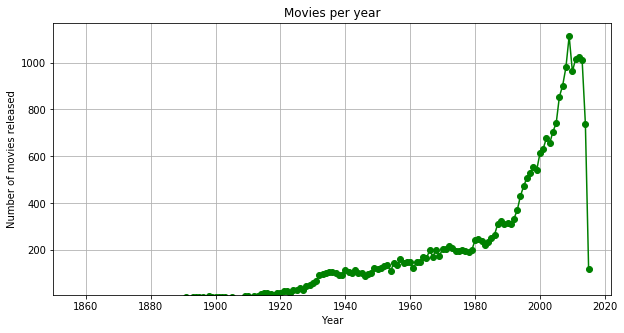

In [81]:
moviesperyear= Movie[['movieId', 'year']].groupby('year')
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(moviesperyear.year.first(), moviesperyear.movieId.nunique(), "g-o")
ax1.grid(None)
ax1.set_xlim(1850,2022)
ax1.set_ylim(10,)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of movies released')
plt.title('Movies per year')
plt.show()

Now, lets explore the rating dataset.

Histogram is a frequency distribution that displays the frequency with which each unique value in a set of data occurs. It is used to display frequency distributions.
Lets plot a histogram for the "rating" column in the rating dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc947632e8>]],
      dtype=object)

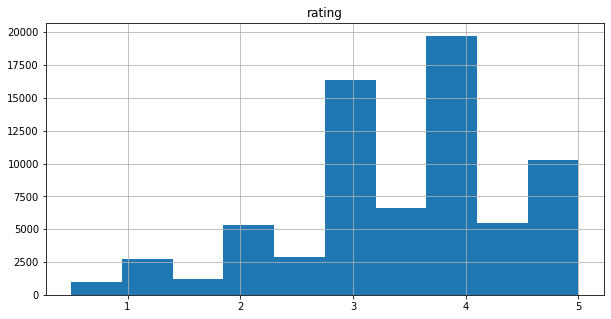

In [82]:
rating.hist(column='rating', figsize=(10,5))

In the "rating" dataset, we have 500 users rating 26,744 number of movies. Lets represent the ratings per user visually using a barplot.The relationship between a numerical and a categorical variable is represented using a bar graph. The size of the bar corresponds to its numeric value.

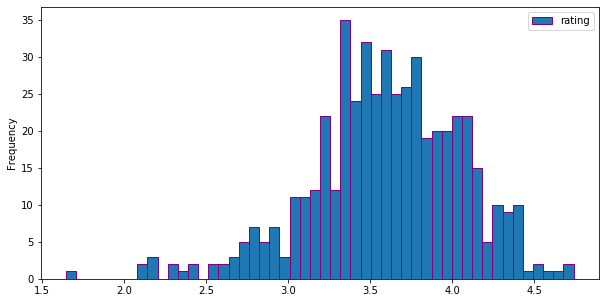

In [83]:
#To get ratings per user, we need to categorize data according to the userId. For this to happen we use groupby()
ratingperuser = rating[['userId','rating']].groupby('userId').mean()
ratingperuser.plot(kind='hist', bins=50, grid=0, edgecolor='purple', figsize=(10,5))

From the entire database, we can visually plot the top 10 user-rated movies. 

[Text(0, 0, '12 (2007)'),
 Text(0, 0, '2 Days in Paris (2007)'),
 Text(0, 0, '8 ½ Women (a.k.a. 8 1/2 Women) (a.k.a. Eight and a Half Women) (1999)'),
 Text(0, 0, 'Absence of Malice (1981)'),
 Text(0, 0, 'Act of Killing, The (2012)'),
 Text(0, 0, 'Akeelah and the Bee (2006)'),
 Text(0, 0, 'And Then There Were None (1945)'),
 Text(0, 0, 'Angel at My Table, An (1990)'),
 Text(0, 0, 'Angel-A (2005)'),
 Text(0, 0, 'Asoka (Ashoka the Great) (2001)')]

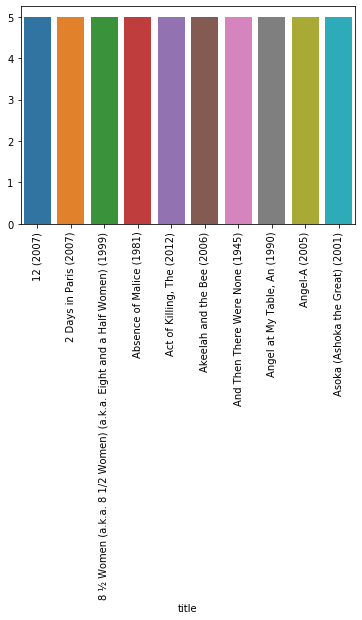

In [84]:
#We group the data based on the rating and take average of that data
#Here, agg(mean) is used to get the rating column average in the "data" dataset
top=data.groupby('title')['rating'].agg('mean')
#We use a bargraph to plot the movie names and their ratings 
#Instead od seperately sorting the data, we can directly use nlargest() to get the n largest values from a sorted dataset.
#In our case, we get the top 10 movies based on their rating values by maximum users 
plt=sns.barplot(x=top.nlargest(10).index,y=top.nlargest(10).values)
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)

In our model,we generated a list of movies to watch for the user with userId=30. Let's now represent the movies rated by the user using a barplot.

In [85]:
Userdata=data[data.userId==User]
Userdata

,movieId,title,userId,rating
301,5,Father of the Bride Part II (1995),30,2.5
4258,163,Desperado (1995),30,1.0
4456,168,First Knight (1995),30,0.5
5534,225,Disclosure (1994),30,2.0
6524,265,Like Water for Chocolate (Como agua para choco...,30,3.0
11739,466,Hot Shots! Part Deux (1993),30,3.5
12926,519,RoboCop 3 (1993),30,2.0
13902,555,True Romance (1993),30,1.5
14449,589,Terminator 2: Judgment Day (1991),30,2.5
15339,596,Pinocchio (1940),30,5.0


[Text(0, 0, 'Father of the Bride Part II (1995)'),
 Text(0, 0, 'Desperado (1995)'),
 Text(0, 0, 'First Knight (1995)'),
 Text(0, 0, 'Disclosure (1994)'),
 Text(0, 0, 'Like Water for Chocolate (Como agua para chocolate) (1992)'),
 Text(0, 0, 'Hot Shots! Part Deux (1993)'),
 Text(0, 0, 'RoboCop 3 (1993)'),
 Text(0, 0, 'True Romance (1993)'),
 Text(0, 0, 'Terminator 2: Judgment Day (1991)'),
 Text(0, 0, 'Pinocchio (1940)'),
 Text(0, 0, 'Sleepers (1996)'),
 Text(0, 0, 'Army of Darkness (1993)'),
 Text(0, 0, 'Sting, The (1973)'),
 Text(0, 0, 'Terminator, The (1984)'),
 Text(0, 0, 'Star Trek VI: The Undiscovered Country (1991)'),
 Text(0, 0, 'Star Trek IV: The Voyage Home (1986)'),
 Text(0, 0, 'X-Files: Fight the Future, The (1998)'),
 Text(0, 0, 'Bambi (1942)'),
 Text(0, 0, 'Seven Beauties (Pasqualino Settebellezze) (1976)'),
 Text(0, 0, 'Life Is Beautiful (La Vita è bella) (1997)'),
 Text(0, 0, 'Arachnophobia (1990)'),
 Text(0, 0, 'RoboCop (1987)'),
 Text(0, 0, 'RoboCop 2 (1990)'),
 Text(0

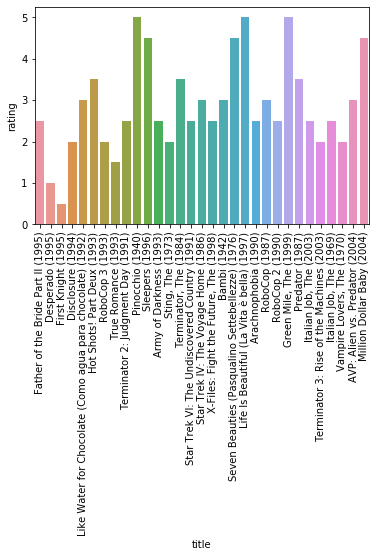

In [86]:
#plot of User=30 movie ratings
plt=sns.barplot(x=data.loc[data['userId']==User]['title'],y=data.loc[data['userId']==User]['rating'])
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)

Finally, we use a heatmap to represent a correlation between user with userId=30 and other users in the dataset. A heatmap is a graphical representation of data that uses color to show the matrix's value. The higher activity values are represented with red color and lower activity values are represented using lighter colors

In [87]:
simmat = pd.DataFrame.from_dict(cossimilarity, orient='index')
simmat.head(15)

,0
30,1.000000
156,0.932236
116,0.887116
359,0.904743
367,0.942338
294,0.922584
298,0.890070
424,0.952106
388,0.907730
457,0.901301


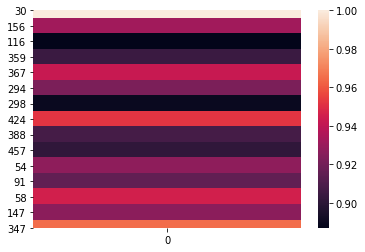

In [88]:
#seaborn library is used to plot a heatmap using seaborn.heatmap() function.
#Heat map generally indicates the strength of correlation among variables. In our case, it is the similarity between users. 
sns.heatmap(simmat.head(15))

After having an exhausting day at school or work, we all feel like relaxing a bit while watching a movie or series. But choosing which one to watch could be a little difficult. I was always fascinated by the Netflix, and YouTube algorithms that recommended us movies or videos according to our previous watched history. Also, recommending a list of films watched by a user to another user based on their similarity of interests is what the collaborative recommender system does. This made me do a little research about the calculation of similarity between users. 

I took the dataset "movielens", which contains a list of movies and ratings of those movies by different users. The "movies" dataset contained MovieId, the Title of the movie, and its genres. The "ratings" dataset contained MovieId, UserId, rating, and timestamp. After checking multiple relationships between these columns.  I cleaned the data, removed unnecessary columns, and merged the required data together.  Using this data, I started building a collaborative recommendation system. For this, I considered a user with userId=30 and checked the movies that the user watched and the ratings given by the user.


[Text(0, 0, 'Father of the Bride Part II (1995)'),
 Text(0, 0, 'Desperado (1995)'),
 Text(0, 0, 'First Knight (1995)'),
 Text(0, 0, 'Disclosure (1994)'),
 Text(0, 0, 'Like Water for Chocolate (Como agua para chocolate) (1992)'),
 Text(0, 0, 'Hot Shots! Part Deux (1993)'),
 Text(0, 0, 'RoboCop 3 (1993)'),
 Text(0, 0, 'True Romance (1993)'),
 Text(0, 0, 'Terminator 2: Judgment Day (1991)'),
 Text(0, 0, 'Pinocchio (1940)'),
 Text(0, 0, 'Sleepers (1996)'),
 Text(0, 0, 'Army of Darkness (1993)'),
 Text(0, 0, 'Sting, The (1973)'),
 Text(0, 0, 'Terminator, The (1984)'),
 Text(0, 0, 'Star Trek VI: The Undiscovered Country (1991)'),
 Text(0, 0, 'Star Trek IV: The Voyage Home (1986)'),
 Text(0, 0, 'X-Files: Fight the Future, The (1998)'),
 Text(0, 0, 'Bambi (1942)'),
 Text(0, 0, 'Seven Beauties (Pasqualino Settebellezze) (1976)'),
 Text(0, 0, 'Life Is Beautiful (La Vita è bella) (1997)'),
 Text(0, 0, 'Arachnophobia (1990)'),
 Text(0, 0, 'RoboCop (1987)'),
 Text(0, 0, 'RoboCop 2 (1990)'),
 Text(0

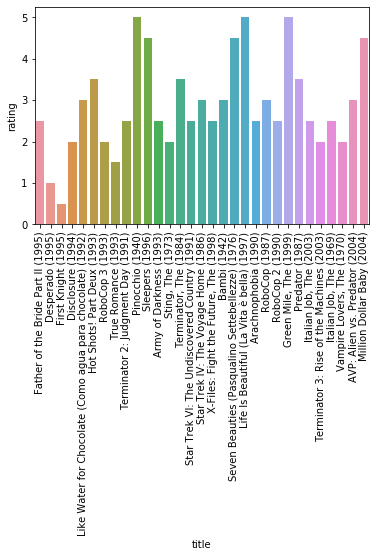

In [89]:
# A graph that shows movies watched and rated by the user with userId=30
User=30 #Our random user 
Userdata=data[data.userId==User]
plt=sns.barplot(x=data.loc[data['userId']==User]['title'],y=data.loc[data['userId']==User]['rating'])
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)

I then made a subset of users who watched the same films as the user. For this subset, I calculated the cosine similarity for the “rating” column. Basically, I’m looking for a group of users who are similar to our user. So that I can recommend the list of movies watched by these users to our user. The cosine similarity is one of the best ways to estimate the relationship between variables as it does not consider the magnitude, but instead takes the orientation into consideration. Therefore, if two variables are far apart by Euclidean distance by size, they could still have a small angle between them.This helps us with improving the efficiency of the model by recommending relevent movies.

            0
30   1.000000
156  0.932236
116  0.887116
359  0.904743
367  0.942338
294  0.922584
298  0.890070
424  0.952106
388  0.907730
457  0.901301
54   0.927503
91   0.915407
58   0.945444
147  0.926361
347  0.965300


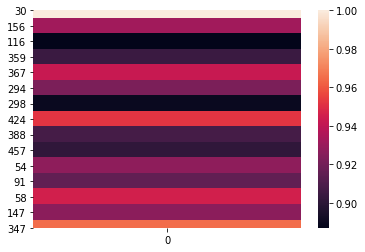

In [90]:
# A similarity matrix is built using the UserId and their correlation 
# A heatmap is used to visually represent the values of a matrix.
simmat = pd.DataFrame.from_dict(cossimilarity, orient='index')
print(simmat.head(15))
sns.heatmap(simmat.head(15))

Here, we considered “rating a film” as a similarity metric between users. The users who gave similar ratings of the films are considered to have a similarity between them. Finally, after finding similar users we recommend the list of movies watched by these users to the user.